# Loan Eligibility Prediction Project

### Project Objectives
This project is to build a **Machine Learning Model** to assist a bank that has received loan applications than it typically receives to predict applicants who are eligible (Creditworthy) for the loan and those that are not.

Besides the prediction, the management team wants to know important features used  by the model for further decisons.

### Table of Content
1. [Data importation](#1.Data-gathering-and-cleaning)

2. [Exploratory data analysis, data cleaning, and Feature engineering](#2.Exploratory-data-analysis,data-cleaning,and-Feature-engineering)

3. [Data preprocessing for modelling](#3.Data-preprocessing-for-modelling)

4. [Building different Classification models](#4.Building-of-Models)

5. [Model Evaluation](#5.Model-Evaluation-and-Comparison)

6. [Model selection](#6.Implementing-the-best-Best-model-with-test-data)

7. [Feature importance](#7.Feature-Importance)

8. [Summary](#8.Summary)



## Importing the needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from bioinfokit.analys import stat
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

In [2]:
# Importing the needed classes for building models,validation, and metrics.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## 1.Data-gathering-and-cleaning

#### About the data

In [3]:
train = pd.read_excel('credit-data-training.xlsx')
print('The train dataset has {} rows, {} columns'.format(train.shape[0],train.shape[1]))

The train dataset has 500 rows, 20 columns


In [4]:
!pip install openpyxl


## 2.Exploratory-data-analysis,data-cleaning,and-Feature-engineering

### Inspecting the data 

In [5]:
train.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


### Checking the data types of the different columns

In [6]:
train.dtypes

Credit-Application-Result             object
Account-Balance                       object
Duration-of-Credit-Month               int64
Payment-Status-of-Previous-Credit     object
Purpose                               object
Credit-Amount                          int64
Value-Savings-Stocks                  object
Length-of-current-employment          object
Instalment-per-cent                    int64
Guarantors                            object
Duration-in-Current-address          float64
Most-valuable-available-asset          int64
Age-years                            float64
Concurrent-Credits                    object
Type-of-apartment                      int64
No-of-Credits-at-this-Bank            object
Occupation                             int64
No-of-dependents                       int64
Telephone                              int64
Foreign-Worker                         int64
dtype: object

### Checking for missing values

In [7]:
train.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

In [8]:
# missing values in percentage wise
(train.isnull().sum()/len(train))*100

Credit-Application-Result             0.0
Account-Balance                       0.0
Duration-of-Credit-Month              0.0
Payment-Status-of-Previous-Credit     0.0
Purpose                               0.0
Credit-Amount                         0.0
Value-Savings-Stocks                  0.0
Length-of-current-employment          0.0
Instalment-per-cent                   0.0
Guarantors                            0.0
Duration-in-Current-address          68.8
Most-valuable-available-asset         0.0
Age-years                             2.4
Concurrent-Credits                    0.0
Type-of-apartment                     0.0
No-of-Credits-at-this-Bank            0.0
Occupation                            0.0
No-of-dependents                      0.0
Telephone                             0.0
Foreign-Worker                        0.0
dtype: float64

A brief inspection of the data reveals that two variables (Duration-in-Current-address ans Age-years) contain missing values.

The missing values will be handled appropriately.

Detailed exploration will be carried out on each columns to help select the right columns for modelling.


### Inspecting and exploring and cleaning the categorical  variables

In [9]:
categorical_var = train.select_dtypes(include = 'object') 
numerical_var = train.select_dtypes(include = np.number) 

In [10]:
# Categorical variables
for col in categorical_var.columns:
    print(col)

Credit-Application-Result
Account-Balance
Payment-Status-of-Previous-Credit
Purpose
Value-Savings-Stocks
Length-of-current-employment
Guarantors
Concurrent-Credits
No-of-Credits-at-this-Bank


###  Creating a function to explore the categorical variables

To easily explore the explore, the categorical variables a function created to give a quick numerical and graphical summary.

In [11]:
# Creating a function to explore the categorical variables
def explore_cat(df,x):
    '''
    This function return a sumaary of a categorical variable
    
    '''
    unique_categories = df[x].nunique()
    if unique_categories <=6:
        print('Summary')
        print('==========')
        print(df[x].describe(),'\n')
        sns.countplot(df[x])
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[x].value_counts(),'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[x].isnull().sum()))
    else:
        print('Summary')
        print('==========')
        print(df[x].describe(),'\n')
        sns.countplot(y=df[x])
        plt.show()
        print('==============================================')
        print('Value counts \n')
        print(df[x].value_counts(),'\n')
        print('==============================================')
        print('Missing values: {}'.format(df[x].isnull().sum()))
    
    
    
    

#### Exploring  Credit-Application-Result

Summary
count              500
unique               2
top       Creditworthy
freq               358
Name: Credit-Application-Result, dtype: object 



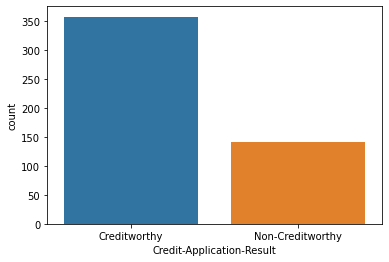

Value counts 

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64 

Missing values: 0


In [12]:
explore_cat(train,'Credit-Application-Result')

By exploring the Credit-Application-Result variable, it is observed that there are two unique categories indicating whether applicants were credit worthy or non-creditworthy.

Comparatively more applicants were credit worthy.

This clearly indicates that the data is not balanced.

The exploration also shows that Credit-Application-Result has no missing values.

### Exploring Account-Balance

In [13]:
train['Account-Balance'].head()

0    Some Balance
1    Some Balance
2    Some Balance
3    Some Balance
4      No Account
Name: Account-Balance, dtype: object

Summary
count            500
unique             2
top       No Account
freq             262
Name: Account-Balance, dtype: object 



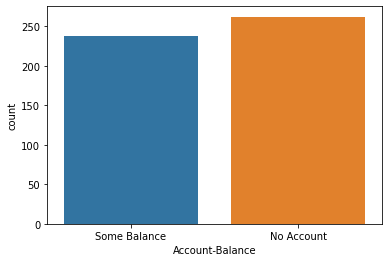

Value counts 

No Account      262
Some Balance    238
Name: Account-Balance, dtype: int64 

Missing values: 0


In [14]:
explore_cat(train,'Account-Balance')

From the summary above, Account-Balance has no missing values and the categories are fairly balanced.


### Exploring Payment-Status-of-Previous-Credit

In [15]:
train['Payment-Status-of-Previous-Credit'].head()

0                       Paid Up
1                       Paid Up
2    No Problems (in this bank)
3    No Problems (in this bank)
4                       Paid Up
Name: Payment-Status-of-Previous-Credit, dtype: object

Summary
count         500
unique          3
top       Paid Up
freq          260
Name: Payment-Status-of-Previous-Credit, dtype: object 



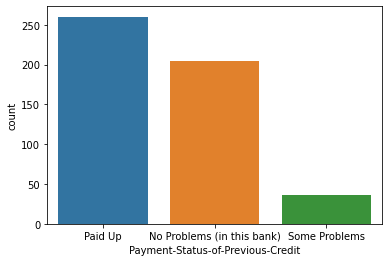

Value counts 

Paid Up                       260
No Problems (in this bank)    204
Some Problems                  36
Name: Payment-Status-of-Previous-Credit, dtype: int64 

Missing values: 0


In [16]:
explore_cat(train,'Payment-Status-of-Previous-Credit')

Payment-Status-of-Previous-Credit has three categories with no missing values

### Purpose

In [17]:
train['Purpose'].head()

0           Other
1    Home Related
2    Home Related
3    Home Related
4    Home Related
Name: Purpose, dtype: object

Summary
count              500
unique               4
top       Home Related
freq               355
Name: Purpose, dtype: object 



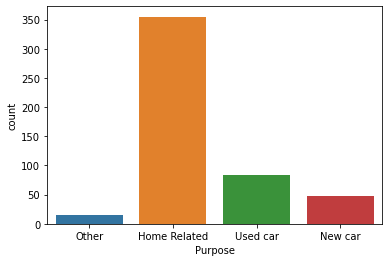

Value counts 

Home Related    355
Used car         83
New car          47
Other            15
Name: Purpose, dtype: int64 

Missing values: 0


In [18]:
explore_cat(train,'Purpose')

In [19]:
pd.crosstab(train['Purpose'],train['Credit-Application-Result'])

Credit-Application-Result,Creditworthy,Non-Creditworthy
Purpose,,
Home Related,244,111
New car,40,7
Other,12,3
Used car,62,21


The out of the explore_cat and the crosstabulation results above indicate that purpose is basically home related or non home related.

Hence,The purpose column is therefore engineared as such in the next line of code.

In [20]:
#Re-categorizing the pupose column

train['Purpose'].replace({'Used car':'Not Home Related',
                          'New car':'Not Home Related',
                          'Other':'Not Home Related'},inplace=True)

Summary
count              500
unique               2
top       Home Related
freq               355
Name: Purpose, dtype: object 



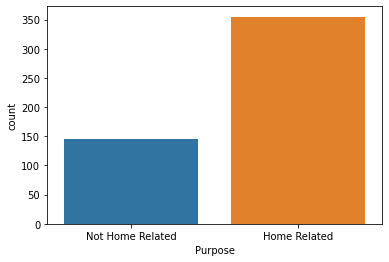

Value counts 

Home Related        355
Not Home Related    145
Name: Purpose, dtype: int64 

Missing values: 0


In [21]:
# Exploring the purpose after re-categorization
explore_cat(train,'Purpose')

Purpose now have two categories with no missing values

### Exploring Value-Savings-Stocks

In [22]:
train['Value-Savings-Stocks'].head()

0    £100-£1000
1    £100-£1000
2          None
3          None
4          None
Name: Value-Savings-Stocks, dtype: object

Summary
count      500
unique       3
top       None
freq       298
Name: Value-Savings-Stocks, dtype: object 



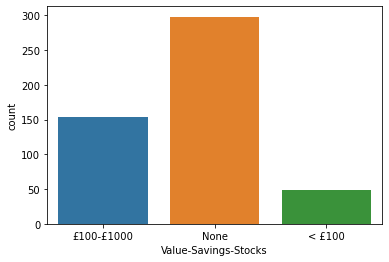

Value counts 

None          298
£100-£1000    154
< £100         48
Name: Value-Savings-Stocks, dtype: int64 

Missing values: 0


In [23]:
explore_cat(train,'Value-Savings-Stocks')

Value-Savings-Stocks has three categories with no missing values

### Exploring Length-of-current-employment

In [24]:
train['Length-of-current-employment'].head()

0      < 1yr
1      < 1yr
2    1-4 yrs
3    1-4 yrs
4      < 1yr
Name: Length-of-current-employment, dtype: object

Summary
count       500
unique        3
top       < 1yr
freq        279
Name: Length-of-current-employment, dtype: object 



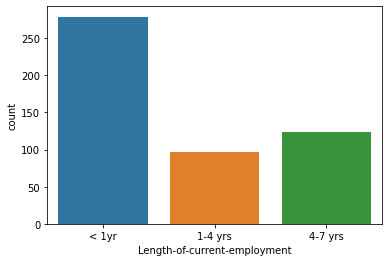

Value counts 

< 1yr      279
4-7 yrs    124
1-4 yrs     97
Name: Length-of-current-employment, dtype: int64 

Missing values: 0


In [25]:
explore_cat(train,'Length-of-current-employment')

In [26]:
pd.crosstab(train['Length-of-current-employment'],train['Credit-Application-Result'],normalize = True)*100

Credit-Application-Result,Creditworthy,Non-Creditworthy
Length-of-current-employment,,
1-4 yrs,15.2,4.2
4-7 yrs,18.8,6.0
< 1yr,37.6,18.2


Length-of-current-employment has three categories (1-4 years,4-7 years, <1 year) with no missing values

### Guarantors

In [27]:
train['Guarantors'].head()

0    None
1    None
2    None
3    None
4    None
Name: Guarantors, dtype: object

Summary
count      500
unique       2
top       None
freq       457
Name: Guarantors, dtype: object 



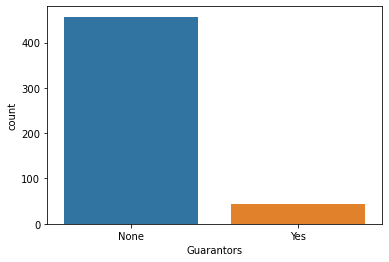

Value counts 

None    457
Yes      43
Name: Guarantors, dtype: int64 

Missing values: 0


In [28]:
explore_cat(train,'Guarantors')

The countplot and the Value counts output of Guarantors shows that it has less variation. Guarantor will be dropped from the input features for building the models. 

### Concurrent-Credits

In [29]:
train['Concurrent-Credits'].head()

0    Other Banks/Depts
1    Other Banks/Depts
2    Other Banks/Depts
3    Other Banks/Depts
4    Other Banks/Depts
Name: Concurrent-Credits, dtype: object

Summary
count                   500
unique                    1
top       Other Banks/Depts
freq                    500
Name: Concurrent-Credits, dtype: object 



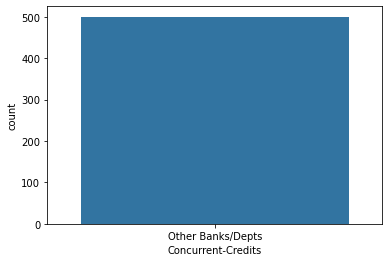

Value counts 

Other Banks/Depts    500
Name: Concurrent-Credits, dtype: int64 

Missing values: 0


In [30]:
explore_cat(train,'Concurrent-Credits')







Concurrent-Credits has only one unique cateogry hence will not provide any infomation to the model.

It will therefore be dropped from the input features.

## No-of-Credits-at-this-Bank

In [31]:
train['No-of-Credits-at-this-Bank'].head()

0              1
1              1
2    More than 1
3              1
4              1
Name: No-of-Credits-at-this-Bank, dtype: object

Summary
count     500
unique      2
top         1
freq      320
Name: No-of-Credits-at-this-Bank, dtype: object 



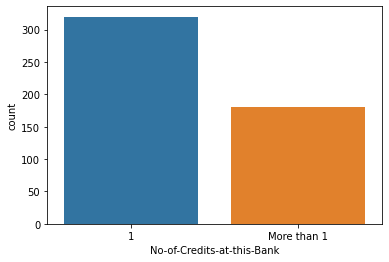

Value counts 

1              320
More than 1    180
Name: No-of-Credits-at-this-Bank, dtype: int64 

Missing values: 0


In [32]:
explore_cat(train,'No-of-Credits-at-this-Bank')

No-of-Credits-at-this-Bank has two categories with no missing values

## Further Exploration of the categorical variables

**Checking the association beween other categorical variables and Credit-Application-Result with Chi-Square test**

In this section, Chi-Square test is carried out just to have an idea about the relationships among the categorical variables.

### Creating a test function to display Chi-Square test output

In [33]:
def test_association(df,x,y):
    '''
    This function displays conducts a chi-square test and displays the output
    '''
    table = pd.crosstab(df[x],df[y])
    test=stat()
    test.chisq(df=table)
    
    
    print('Null hypothesis: {} and {} are Independent'.format(x,y))
    print('Alternative hypothesis: {} and {} are Dependent\n'.format(x,y))
    print('Test results')
    print('='*55)
    print('Observed frequency values \n')
    print(table)
    
    print('*'*55)
    print(test.expected_df)
    print('*'*55)
    print(test.summary)    

**Association between Credit-Application-Result and Account-Balance**

In [34]:
test_association(train,'Credit-Application-Result','Account-Balance')

Null hypothesis: Credit-Application-Result and Account-Balance are Independent
Alternative hypothesis: Credit-Application-Result and Account-Balance are Dependent

Test results
Observed frequency values 

Account-Balance            No Account  Some Balance
Credit-Application-Result                          
Creditworthy                      152           206
Non-Creditworthy                  110            32
*******************************************************

Expected frequency counts

      No Account    Some Balance
--  ------------  --------------
 0       187.592         170.408
 1        74.408          67.592

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       48.5598  3.20374e-12
Log-likelihood     1       50.8098  1.01762e-12



From the test results,the p_value is **3.20374e-12**.
This implies that at a significance level of 0.05,there is enought eveidence to reject the null hypothesis hence conclude that, there is an association between Credit-Application-Result and Account-Balance.

In [35]:
test_association(train,'Credit-Application-Result','Payment-Status-of-Previous-Credit')

Null hypothesis: Credit-Application-Result and Payment-Status-of-Previous-Credit are Independent
Alternative hypothesis: Credit-Application-Result and Payment-Status-of-Previous-Credit are Dependent

Test results
Observed frequency values 

Payment-Status-of-Previous-Credit  No Problems (in this bank)  Paid Up  \
Credit-Application-Result                                                
Creditworthy                                              162      185   
Non-Creditworthy                                           42       75   

Payment-Status-of-Previous-Credit  Some Problems  
Credit-Application-Result                         
Creditworthy                                  11  
Non-Creditworthy                              25  
*******************************************************

Expected frequency counts

      No Problems (in this bank)    Paid Up    Some Problems
--  ----------------------------  ---------  ---------------
 0                       146.064     186.16         

**Association between Credit-Application-Result and Purpose**

In [36]:
test_association(train,'Credit-Application-Result','Purpose')

Null hypothesis: Credit-Application-Result and Purpose are Independent
Alternative hypothesis: Credit-Application-Result and Purpose are Dependent

Test results
Observed frequency values 

Purpose                    Home Related  Not Home Related
Credit-Application-Result                                
Creditworthy                        244               114
Non-Creditworthy                    111                31
*******************************************************

Expected frequency counts

      Home Related    Not Home Related
--  --------------  ------------------
 0          254.18              103.82
 1          100.82               41.18

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       4.47603  0.0343735
Log-likelihood     1       4.62836  0.0314477



**Association between Credit-Application-Result Value-Savings-Stocks**

In [37]:
test_association(train,'Credit-Application-Result','Value-Savings-Stocks')

Null hypothesis: Credit-Application-Result and Value-Savings-Stocks are Independent
Alternative hypothesis: Credit-Application-Result and Value-Savings-Stocks are Dependent

Test results
Observed frequency values 

Value-Savings-Stocks       < £100  None  £100-£1000
Credit-Application-Result                          
Creditworthy                   36   195         127
Non-Creditworthy               12   103          27
*******************************************************

Expected frequency counts

      < £100     None    £100-£1000
--  --------  -------  ------------
 0    34.368  213.368       110.264
 1    13.632   84.632        43.736

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2        14.785  0.00061586
Log-likelihood     2        15.481  0.000434851



**Association between Credit-Application-Result and Length-of-current-employment**

In [38]:
test_association(train,'Credit-Application-Result','Length-of-current-employment')

Null hypothesis: Credit-Application-Result and Length-of-current-employment are Independent
Alternative hypothesis: Credit-Application-Result and Length-of-current-employment are Dependent

Test results
Observed frequency values 

Length-of-current-employment  1-4 yrs  4-7 yrs  < 1yr
Credit-Application-Result                            
Creditworthy                       76       94    188
Non-Creditworthy                   21       30     91
*******************************************************

Expected frequency counts

      1-4 yrs    4-7 yrs    < 1yr
--  ---------  ---------  -------
 0     69.452     88.784  199.764
 1     27.548     35.216   79.236

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2       5.69213  0.0580725
Log-likelihood     2       5.78294  0.0554945



In [39]:
test_association(train,'Credit-Application-Result','Account-Balance')

Null hypothesis: Credit-Application-Result and Account-Balance are Independent
Alternative hypothesis: Credit-Application-Result and Account-Balance are Dependent

Test results
Observed frequency values 

Account-Balance            No Account  Some Balance
Credit-Application-Result                          
Creditworthy                      152           206
Non-Creditworthy                  110            32
*******************************************************

Expected frequency counts

      No Account    Some Balance
--  ------------  --------------
 0       187.592         170.408
 1        74.408          67.592

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            1       48.5598  3.20374e-12
Log-likelihood     1       50.8098  1.01762e-12



**Association Credit-Application-Result and No-of-Credits-at-this-Bank**

In [40]:
test_association(train,'Credit-Application-Result','No-of-Credits-at-this-Bank')

Null hypothesis: Credit-Application-Result and No-of-Credits-at-this-Bank are Independent
Alternative hypothesis: Credit-Application-Result and No-of-Credits-at-this-Bank are Dependent

Test results
Observed frequency values 

No-of-Credits-at-this-Bank    1  More than 1
Credit-Application-Result                   
Creditworthy                223          135
Non-Creditworthy             97           45
*******************************************************

Expected frequency counts

         1    More than 1
--  ------  -------------
 0  229.12         128.88
 1   90.88          51.12

*******************************************************

Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            1       1.34831   0.245574
Log-likelihood     1       1.36299   0.243021



The chi-square test returns a p_value of 0.245574 which is greater than 0.05.

This indicate that at asignificant level of 0.05, these is no enougth evidence to reject the null hypothesis and 

conclude the these is no association between  Credit-Application-Result and No-of-Credits-at-this-Bank.

This suggests that No-of-Credits-at-this-Bank may be drooped from the input features if need be.

# Exploring the numerical Variables

In [41]:
# Numerical variables

for col in numerical_var.columns:
    print(col)

Duration-of-Credit-Month
Credit-Amount
Instalment-per-cent
Duration-in-Current-address
Most-valuable-available-asset
Age-years
Type-of-apartment
Occupation
No-of-dependents
Telephone
Foreign-Worker


###  Creating a function to explore the numerical variables

In [42]:


def explore_num(df,x):
    '''
    This function gives a numerical and graphical summary of numerical column of a DataFrame
    '''
    print('Summary Statistics \n')
    print(df[x].apply([len,min,max,np.median,np.mean,np.std]))
    print('======================================')
    print('Missing values: {}'.format(df[x].isnull().sum()))
    print('======================================\n')
    plt.figure(figsize = (8,4))
    #plotting a boxplot
    meanpointprops = dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick')
    medianprops = dict(linestyle='-.', linewidth=3, color='gold')
    plt.subplot(1,2,1)
    plt.boxplot(df[x],vert=True,patch_artist=True,notch = True,
            showmeans = True,medianprops = medianprops,meanprops = meanpointprops)
    plt.xlabel(df[x].name)
    plt.title('Boxplot')

    # plotting a histogram
    plt.subplot(1,2,2)
    plt.hist(df[x])
    plt.title('Histogram')
    plt.tight_layout()
    plt.show()
    


### Duration-of-Credit-Month

In [43]:
train['Duration-of-Credit-Month'].head()

0    4
1    4
2    4
3    4
4    6
Name: Duration-of-Credit-Month, dtype: int64

Summary Statistics 

len       500.00000
min         4.00000
max        60.00000
median     18.00000
mean       21.43400
std        12.30742
Name: Duration-of-Credit-Month, dtype: float64
Missing values: 0



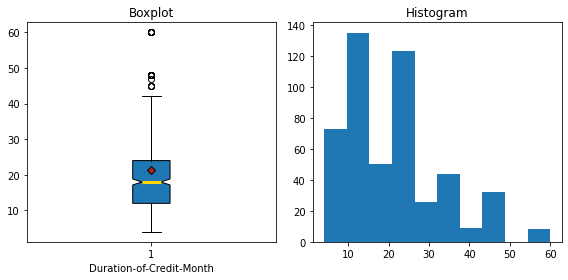

In [44]:
explore_num(train,'Duration-of-Credit-Month')

### Credit-Amount

In [45]:
train['Credit-Amount'].head()

0    1494
1    1494
2    1544
3    3380
4     343
Name: Credit-Amount, dtype: int64

Summary Statistics 

len         500.000000
min         276.000000
max       18424.000000
median     2236.500000
mean       3199.980000
std        2831.386861
Name: Credit-Amount, dtype: float64
Missing values: 0



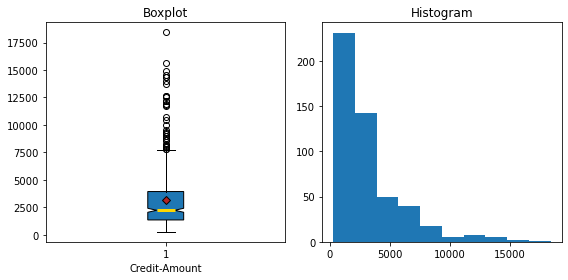

In [46]:
explore_num(train,'Credit-Amount')

### Instalment-per-cent

In [47]:
train['Credit-Amount'].head()

0    1494
1    1494
2    1544
3    3380
4     343
Name: Credit-Amount, dtype: int64

Summary Statistics 

len       500.000000
min         1.000000
max         4.000000
median      3.000000
mean        3.010000
std         1.113724
Name: Instalment-per-cent, dtype: float64
Missing values: 0



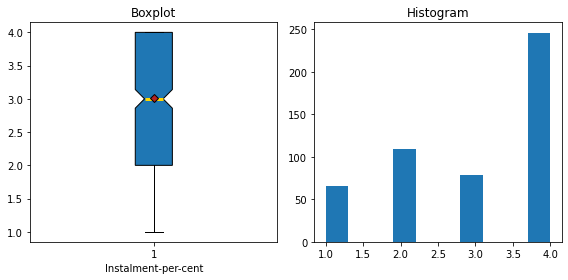

In [48]:
explore_num(train,'Instalment-per-cent')

### Duration-in-Current-address

In [49]:
train['Duration-in-Current-address'].head()

0    2.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: Duration-in-Current-address, dtype: float64

Summary Statistics 

len       500.000000
min         1.000000
max         4.000000
median      2.000000
mean        2.660256
std         1.150017
Name: Duration-in-Current-address, dtype: float64
Missing values: 344



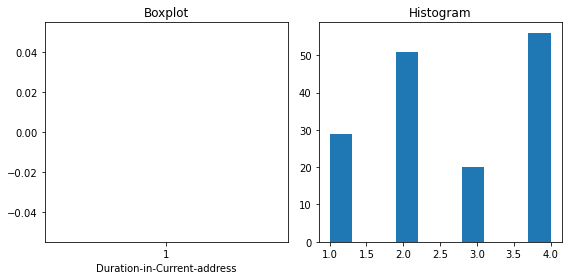

In [50]:
explore_num(train,'Duration-in-Current-address')

In [51]:
print(train['Duration-in-Current-address'].isnull().sum()/len(train['Duration-in-Current-address'])*100,
      'percent of the values are missing')

68.8 percent of the values are missing


After exploring the occupation, it is realized that close to **70** percent of the values are missing.

It wiil therefore be dropped from the  features since it's distribution will change serverely if the missing values are being imputed which may be missleading.

### Most-valuable-available-asset

In [52]:
train['Most-valuable-available-asset'].head()

0    1
1    1
2    1
3    1
4    1
Name: Most-valuable-available-asset, dtype: int64

Summary Statistics 

len       500.000000
min         1.000000
max         4.000000
median      3.000000
mean        2.360000
std         1.064268
Name: Most-valuable-available-asset, dtype: float64
Missing values: 0



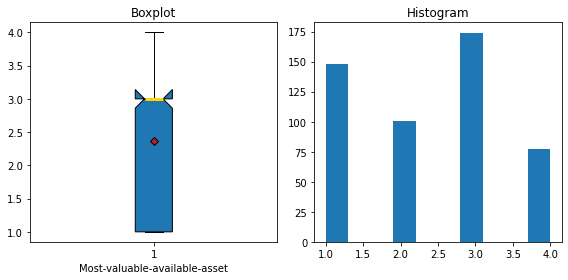

In [53]:
explore_num(train,'Most-valuable-available-asset')

### Age-years

In [54]:
train['Age-years'].head()

0     NaN
1    29.0
2    42.0
3    37.0
4    27.0
Name: Age-years, dtype: float64

Summary Statistics 

len       500.000000
min        19.000000
max        75.000000
median     33.000000
mean       35.637295
std        11.501522
Name: Age-years, dtype: float64
Missing values: 12



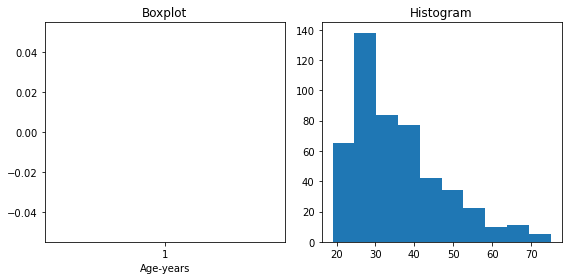

In [55]:
explore_num(train,'Age-years')


The median age is because there are outliers. And median is not is affected by outliers it becomes the appropriate metric to use in this case.


In [56]:
# 
null_id=train['Age-years'][train['Age-years'].isnull()].index

In [57]:
train['Age-years'][null_id]

0     NaN
52    NaN
63    NaN
115   NaN
139   NaN
151   NaN
172   NaN
321   NaN
345   NaN
363   NaN
389   NaN
495   NaN
Name: Age-years, dtype: float64

**Replacing missing age values with the median age**

In [58]:
train['Age-years']=train['Age-years'].fillna(train['Age-years'].median())

Summary Statistics 

len       500.000000
min        19.000000
max        75.000000
median     33.000000
mean       35.574000
std        11.369567
Name: Age-years, dtype: float64
Missing values: 0



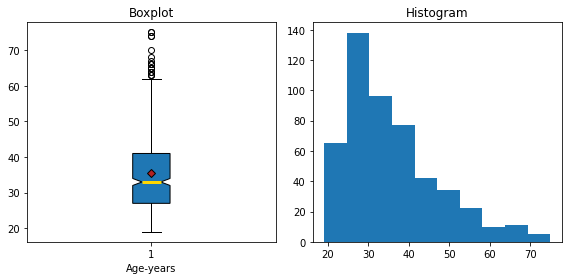

In [59]:
# Exploring the variable after fixing the missing values
explore_num(train,'Age-years')

### Type-of-apartment

In [60]:
train['Type-of-apartment'].head()

0    2
1    2
2    2
3    2
4    2
Name: Type-of-apartment, dtype: int64

Summary Statistics 

len       500.000000
min         1.000000
max         3.000000
median      2.000000
mean        1.928000
std         0.539814
Name: Type-of-apartment, dtype: float64
Missing values: 0



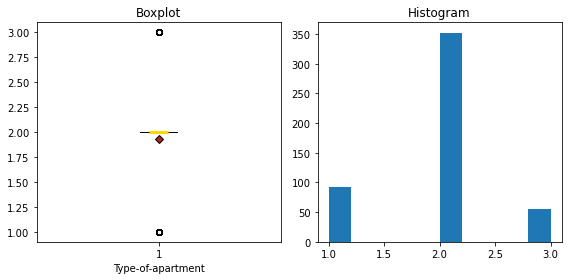

In [61]:
explore_num(train,'Type-of-apartment')

In [62]:
pd.crosstab(train['Type-of-apartment'],train['Credit-Application-Result'])

Credit-Application-Result,Creditworthy,Non-Creditworthy
Type-of-apartment,,
1,63,29
2,261,91
3,34,22


### Occupation

In [63]:
train['Occupation'].head()

0    1
1    1
2    1
3    1
4    1
Name: Occupation, dtype: int64

Summary Statistics 

len       500.0
min         1.0
max         1.0
median      1.0
mean        1.0
std         0.0
Name: Occupation, dtype: float64
Missing values: 0



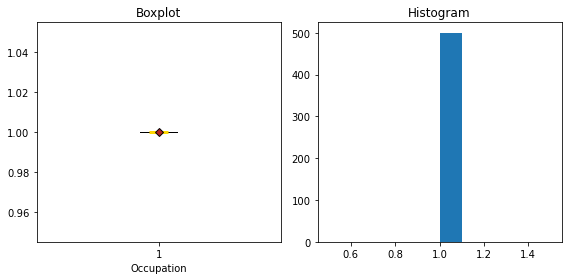

In [64]:
explore_num(train,'Occupation')

The summary statistics, the boxplot and the histogram clearly reveal that the Occupation variable is a constant of value 1. Hence, it will be dropped from the input features for building the models.

### No-of-dependents

In [65]:
train['No-of-dependents'].head()

0    2
1    2
2    2
3    2
4    1
Name: No-of-dependents, dtype: int64

Summary Statistics 

len       500.00000
min         1.00000
max         2.00000
median      1.00000
mean        1.14600
std         0.35346
Name: No-of-dependents, dtype: float64
Missing values: 0



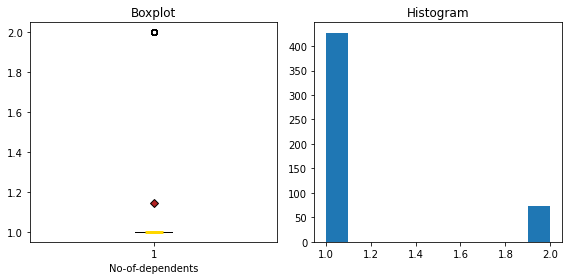

In [66]:
explore_num(train,'No-of-dependents')

The exploration of the No-of-dependents indicates that it has low variation.

It will therefore be dropped from the input features.


In [67]:
pd.crosstab(train['No-of-dependents'],train['Credit-Application-Result'],normalize='index')*100

Credit-Application-Result,Creditworthy,Non-Creditworthy
No-of-dependents,,
1,72.365340,27.634660
2,67.123288,32.876712


### Telephone

In [68]:
train['Telephone'].head()

0    1
1    1
2    1
3    1
4    1
Name: Telephone, dtype: int64

Summary Statistics 

len       500.000000
min         1.000000
max         2.000000
median      1.000000
mean        1.400000
std         0.490389
Name: Telephone, dtype: float64
Missing values: 0



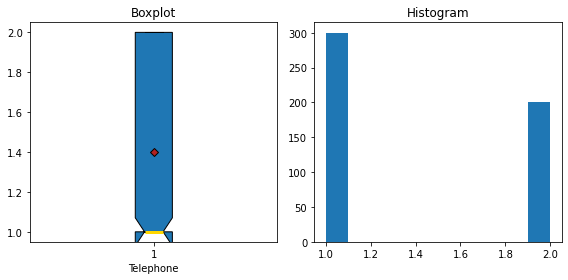

In [69]:
explore_num(train,'Telephone')

Telephone will dropped based on the descretion that it will not add information to the model.

### Foreign-Worker

In [70]:
train['Foreign-Worker'].head()

0    2
1    2
2    1
3    1
4    1
Name: Foreign-Worker, dtype: int64

Summary Statistics 

len       500.000000
min         1.000000
max         2.000000
median      1.000000
mean        1.038000
std         0.191388
Name: Foreign-Worker, dtype: float64
Missing values: 0



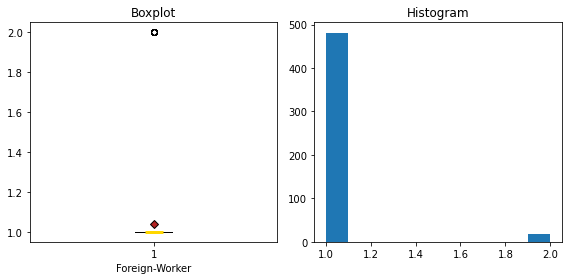

In [71]:
explore_num(train,'Foreign-Worker')

Foreign-Worker has low variance and will be dropped

### Calculating correlation among the numerical variables to investigate for multi-colinearity

In [72]:
cor = numerical_var.corr()

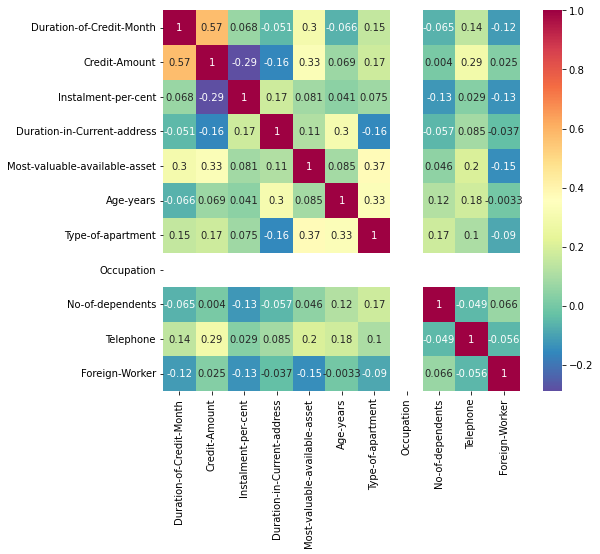

In [73]:
plt.figure(figsize=(8,7))
sns.heatmap(cor,annot = cor,cmap = 'Spectral_r')
plt.show()

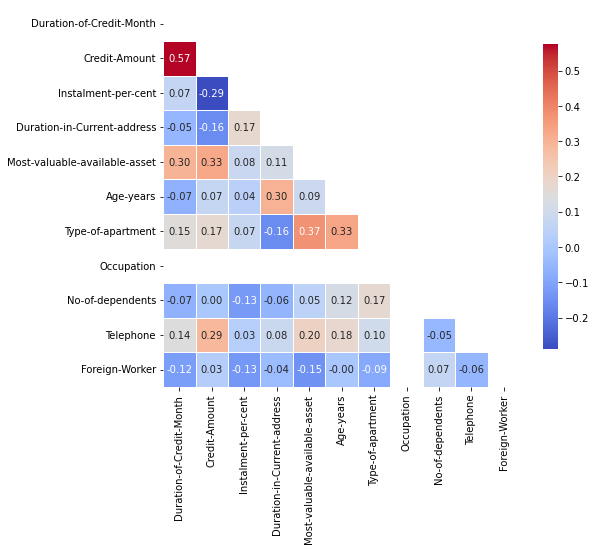

In [74]:
# creating a mask to keep only the half of the correlation table

mask = np.triu(np.ones_like(cor,dtype=bool))

plt.figure(figsize=(8,7))
sns.heatmap(cor,annot = cor,mask=mask,
            cmap = 'coolwarm',
            linewidths=1,fmt=".2f",
            cbar_kws={"shrink": .8})
plt.show()


From the heatmap above, there is a moderate correlation between the  Credit-Amount and  Duration-of-Credit-Month.
However both variables will be maintained in the training features since the correlation is not too high.

### Inspecting the cleaned dataset

In [75]:
for col in train.columns:
    print(col)

Credit-Application-Result
Account-Balance
Duration-of-Credit-Month
Payment-Status-of-Previous-Credit
Purpose
Credit-Amount
Value-Savings-Stocks
Length-of-current-employment
Instalment-per-cent
Guarantors
Duration-in-Current-address
Most-valuable-available-asset
Age-years
Concurrent-Credits
Type-of-apartment
No-of-Credits-at-this-Bank
Occupation
No-of-dependents
Telephone
Foreign-Worker


In [76]:
for col in train.columns:
    print(col)

Credit-Application-Result
Account-Balance
Duration-of-Credit-Month
Payment-Status-of-Previous-Credit
Purpose
Credit-Amount
Value-Savings-Stocks
Length-of-current-employment
Instalment-per-cent
Guarantors
Duration-in-Current-address
Most-valuable-available-asset
Age-years
Concurrent-Credits
Type-of-apartment
No-of-Credits-at-this-Bank
Occupation
No-of-dependents
Telephone
Foreign-Worker


In [77]:
train.dtypes

Credit-Application-Result             object
Account-Balance                       object
Duration-of-Credit-Month               int64
Payment-Status-of-Previous-Credit     object
Purpose                               object
Credit-Amount                          int64
Value-Savings-Stocks                  object
Length-of-current-employment          object
Instalment-per-cent                    int64
Guarantors                            object
Duration-in-Current-address          float64
Most-valuable-available-asset          int64
Age-years                            float64
Concurrent-Credits                    object
Type-of-apartment                      int64
No-of-Credits-at-this-Bank            object
Occupation                             int64
No-of-dependents                       int64
Telephone                              int64
Foreign-Worker                         int64
dtype: object

In [78]:
train.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                              0
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

In [79]:
train.shape

(500, 20)

# 3.Data-preprocessing-for-modelling

### Dropping less important variables for building the models based the Exploratory Data Analysis

In [80]:
# Dropping 'Occupation','Duration-in-Current-address','Concurrent-Credits',
#'Telephone','Guarantors','Foreign-Worker','No-of-dependents' from the training features
train.drop(['Occupation',
            'Duration-in-Current-address',
            'Concurrent-Credits',
            'Telephone',
            'Guarantors',
            'Foreign-Worker',
            'No-of-dependents'],
           axis = 1,inplace = True)

### Changing the target variable to a dummy variable

In [81]:
train['Credit-Application-Result'] =train['Credit-Application-Result'].replace({'Creditworthy':1,'Non-Creditworthy':0})

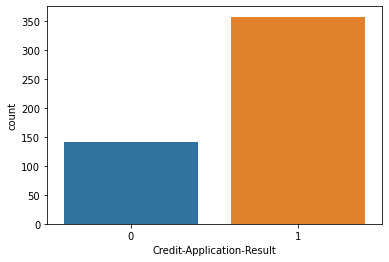

In [82]:
sns.countplot(train['Credit-Application-Result'])
plt.show()

### Changing the categorical features into dummy variables

In [83]:
cat = train.select_dtypes('object')

In [84]:
cat.head(3)

,Account-Balance,Payment-Status-of-Previous-Credit,Purpose,Value-Savings-Stocks,Length-of-current-employment,No-of-Credits-at-this-Bank
0,Some Balance,Paid Up,Not Home Related,£100-£1000,< 1yr,1
1,Some Balance,Paid Up,Home Related,£100-£1000,< 1yr,1
2,Some Balance,No Problems (in this bank),Home Related,None,1-4 yrs,More than 1


In [85]:
train = pd.get_dummies(train,columns =['Account-Balance',
                                       'Payment-Status-of-Previous-Credit',
                                          'Purpose',
                                       'Value-Savings-Stocks',
                                       'Length-of-current-employment',
                                          'No-of-Credits-at-this-Bank'],
                       drop_first = True )

### Inspecting the data again

In [86]:
train.dtypes

Credit-Application-Result                            int64
Duration-of-Credit-Month                             int64
Credit-Amount                                        int64
Instalment-per-cent                                  int64
Most-valuable-available-asset                        int64
Age-years                                          float64
Type-of-apartment                                    int64
Account-Balance_Some Balance                         uint8
Payment-Status-of-Previous-Credit_Paid Up            uint8
Payment-Status-of-Previous-Credit_Some Problems      uint8
Purpose_Not Home Related                             uint8
Value-Savings-Stocks_None                            uint8
Value-Savings-Stocks_£100-£1000                      uint8
Length-of-current-employment_4-7 yrs                 uint8
Length-of-current-employment_< 1yr                   uint8
No-of-Credits-at-this-Bank_More than 1               uint8
dtype: object

In [87]:
train.shape

(500, 16)

In [88]:
train.head()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Not Home Related,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,1,4,1494,1,1,33.0,2,1,1,0,1,0,1,0,1,0
1,1,4,1494,1,1,29.0,2,1,1,0,0,0,1,0,1,0
2,1,4,1544,2,1,42.0,2,1,0,0,0,1,0,0,0,1
3,1,4,3380,1,1,37.0,2,1,0,0,0,1,0,0,0,0
4,1,6,343,4,1,27.0,2,0,1,0,0,1,0,0,1,0


In [89]:
train.describe()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Not Home Related,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.716000,21.43400,3199.980000,3.010000,2.360000,35.574000,1.928000,0.476000,0.5200,0.072000,0.290000,0.596000,0.308000,0.248000,0.558000,0.360000
std,0.451388,12.30742,2831.386861,1.113724,1.064268,11.369567,0.539814,0.499924,0.5001,0.258747,0.454216,0.491189,0.462129,0.432284,0.497122,0.480481
min,0.000000,4.00000,276.000000,1.000000,1.000000,19.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.00000,1357.250000,2.000000,1.000000,27.000000,2.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,18.00000,2236.500000,3.000000,3.000000,33.000000,2.000000,0.000000,1.0000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,24.00000,3941.500000,4.000000,3.000000,41.000000,2.000000,1.000000,1.0000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,60.00000,18424.000000,4.000000,4.000000,75.000000,3.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


A general inspection of the descriptive statistics above indicates that variables have different scales which may cause models to put more weight on those with high values at the expense of those with low values.

To resolve this, the variables may or may not be scaled depending on the kind of algorithm that is used.


### Seperating the data into target variable and predictors

In [90]:
# predictors
X = train.drop('Credit-Application-Result',axis = 1)

# Target variable
y = train['Credit-Application-Result']# 

In [91]:
X.head()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_Some Balance,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Purpose_Not Home Related,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_More than 1
0,4,1494,1,1,33.0,2,1,1,0,1,0,1,0,1,0
1,4,1494,1,1,29.0,2,1,1,0,0,0,1,0,1,0
2,4,1544,2,1,42.0,2,1,0,0,0,1,0,0,0,1
3,4,3380,1,1,37.0,2,1,0,0,0,1,0,0,0,0
4,6,343,4,1,27.0,2,0,1,0,0,1,0,0,1,0


In [92]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Credit-Application-Result, dtype: int64

### Splitting the data into train_set and test_set

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 0)

### Checking whether the target variable is balanced or not

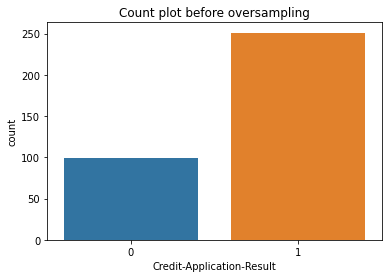

In [94]:
sns.countplot(y_train)
plt.title('Count plot before oversampling')
plt.show()

The graph above shows that the classes target variable is not balanced.

This presupposes that accuracy would not a good metric for measuring the performance of models built on this data.
Other metrics need to be employed in this case or the data should be balanced by employing a statiscal technique.

# 4.Building-of-Models

**In order to optimize the models, gridsearch with cross validation is applied to tune the hyperparameters of the different algorithms.**

## Decision tree as a base model

**Decision tree classifier before hyperparameter tuning**

In [95]:
#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))

train accuracy: 1.00
test accuracy: 0.74


**Hyperparameter tuning for decision tree**

In [96]:
# Hyperparameter tuning using gridsearch and cross validation.

#Instantiating the model
tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_tree = GridSearchCV(tree, param_grid = param_grid,cv =5)
grid_tree.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_tree.best_score_))
print('Best test score: {:.2f}'.format(grid_tree.score(X_test,y_test)))
print('Best parameters:',grid_tree.best_params_)


Best cross-validation acuracy: 0.75
Best test score: 0.75
Best parameters: {'max_features': 5, 'max_leaf_nodes': 5}


**Decision tree classifier after hyperparameter tuning**

In [97]:
#Instantiating the model
tree = DecisionTreeClassifier(max_features=10,max_leaf_nodes=5,random_state=42)

#Fitting the model
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)

# Print train and test accuracies
print('train accuracy: {:.2f}'.format(tree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(tree.score(X_test,y_test)))


train accuracy: 0.78
test accuracy: 0.79


A train accuracy of 0.78 (0.78%) and a test accuracy of 0.79(78%) indicates that model is doing quiet well and  it is not overfitting.

Different models are bui are built below in other to the best model.

# Logistic Regression

**Logistic Regression before hyperparameter tuning**

In [98]:
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))


train score: 0.77
test score: 0.81


**Hyperparameter tuning for Logistic Regression**

In [99]:
# Hyperparameter tuning
lr = LogisticRegression()
param_grid = {'C': [1,2,3,4,5,6,7,8,9,10,11]}
grid_lgr = GridSearchCV(lr, param_grid, cv=5)
grid_lgr.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_lgr.best_score_))
print('Best test score: {:.2f}'.format(grid_lgr.score(X_test,y_test)))
print('Best parameters:',grid_lgr.best_params_)


Best cross-validation acuracy: 0.73
Best test score: 0.80
Best parameters: {'C': 8}


**Logistic Regression after hyperparameter tuning**

In [100]:
# Logistic regression with tuned hyper-parameters

lgr = LogisticRegression(C=2).fit(X_train,y_train)
print('train score: {:.2f}'.format(lgr.score(X_train,y_train)))
print('test score: {:.2f}'.format(lgr.score(X_test,y_test)))
lgr_y_pred =lgr.predict(X_test)

train score: 0.77
test score: 0.82


# Support Vector Machine

**Support vector classifier before hyperparameter tuning**

In [101]:
# SVC with tuned Hyper-parameters

Svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True))])
Svc_model = Svc.fit(X_train,y_train)
print('train score: {:.2f}'.format(Svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(Svc_model.score(X_test,y_test)))

train score: 0.82
test score: 0.80


**Hyperparameter tuning for Support vector classifier**

In [102]:
#Hyper-parameter tuning with using pipline and gridsearch

pipe = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(probability=True))])
param_grid = {'SVC__C':[0.001,0.01,0.1,1,10,100],
            'SVC__gamma':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(pipe, param_grid = param_grid,cv =5)
grid.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid.best_score_))
#print('Best train score: {:.2f}'.format(grid.score(X_train,y_train)))
print('Best test score: {:.2f}'.format(grid.score(X_test,y_test)))
print('Best parameters:',grid.best_params_)

Best cross-validation acuracy: 0.76
Best test score: 0.80
Best parameters: {'SVC__C': 10, 'SVC__gamma': 0.01}


**Support vector classifier after hyperparameter tuning**

In [103]:
# SVC with tuned Hyper-parameters
Svc = Pipeline([('Scaler',StandardScaler()),('SVC',SVC(C=10,gamma=0.01,probability=True))])
Svc_model = Svc.fit(X_train,y_train)
print('train score: {:.2f}'.format(Svc_model.score(X_train,y_train)))
print('test score: {:.2f}'.format(Svc_model.score(X_test,y_test)))
Svc_y_pred = Svc_model.predict(X_test)

train score: 0.80
test score: 0.80


# Random Forest

**Random Forest classifier before hyperparameter tuning**

In [104]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))


train score: 1.00
test score: 0.81


**Hyperparameter tuning for Random Forestclassifier**

In [105]:
rfc = RandomForestClassifier(random_state = 0)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_rfc = GridSearchCV(rfc, param_grid = param_grid,cv =5)
grid_rfc.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)

Best cross-validation acuracy: 0.76
Best test score: 0.80
Best parameters: {'max_features': 6, 'max_leaf_nodes': 7}


**Random Forest  classifier after hyperparameter tuning**

In [106]:
rfc = RandomForestClassifier(max_features=5,max_leaf_nodes=10,random_state = 0)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))
rfc_y_pred = rfc.predict(X_test)

train score: 0.83
test score: 0.81


## Gradient Boosting Classifier

Gradient Boosting Classifier before hyperparameter tuning

In [107]:
gbc = GradientBoostingClassifier(n_estimators=300,random_state=42)
gbc.fit(X_train,y_train)
print('Train accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_train,y_train)))
print('Test accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_test,y_test)))

Train accuracy of GradientBoosting Classifier: 1.000
Test accuracy of GradientBoosting Classifier: 0.767


**Hyperparameter for Gradient Boosting Classifier**

In [108]:
gbc = GradientBoostingClassifier(n_estimators=300, max_depth=1, random_state=42)
param_grid = {'max_features': [1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2, 3,4,5,6,7,8,9,10]}
grid_gbc = GridSearchCV(gbc, param_grid = param_grid,cv =5)

grid_gbc.fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_gbc.best_score_))
print('Best test score: {:.2f}'.format(grid_gbc.score(X_test,y_test)))
print('Best parameters:',grid_gbc.best_params_)

Best cross-validation acuracy: 0.77
Best test score: 0.79
Best parameters: {'max_features': 1, 'max_leaf_nodes': 2}


**Gradient Boosting Classifier after hyperparameter tuning**

In [109]:
gbc = GradientBoostingClassifier(n_estimators=500,max_depth=3,max_features=3,max_leaf_nodes=2,random_state=42)
gbc.fit(X_train,y_train)
gbc_y_pred =gbc.predict(X_test) 
print('Train accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_train,y_train)))
print('Test accuracy of GradientBoosting Classifier: {:.3f}'.format(gbc.score(X_test,y_test)))

Train accuracy of GradientBoosting Classifier: 0.829
Test accuracy of GradientBoosting Classifier: 0.780


## Ada Boost Classifier

In [110]:
# Instantiate a decition tree classifier
dt=DecisionTreeClassifier(max_depth=1,max_leaf_nodes=2,random_state=42)

# Instantiate an AdaBoost classifier
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100,random_state=0)

# Fit 'adb_clf' to the training set
adb_clf.fit(X_train,y_train)
adb_y_pred = adb_clf.predict(X_test)
print('Train accuracy of AdaBoostClassifier: {:.3f}'.format(adb_clf.score(X_train,y_train)))
print('Test accuracy of AdaBoostClassifier: {:.3f}'.format(adb_clf.score(X_test,y_test)))

Train accuracy of AdaBoostClassifier: 0.863
Test accuracy of AdaBoostClassifier: 0.773


# Votting classifier

In [111]:
# Instantiate individual classifiers
Logr = LogisticRegression(random_state=42,C=6)
Svc = SVC(C=10,gamma=0.01,probability=True)
Dtr = DecisionTreeClassifier(max_features=10,max_leaf_nodes=5,random_state=42)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', Logr),
('svc', Svc),
('Classification Tree', Dtr)]

In [112]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
        #fit clf to the training set
        clf.fit(X_train,y_train)
        # Predict the labels of the test set
        y_pred = clf.predict(X_test)
        # Evaluate the accuracy of clf on the test set
        print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.820
svc : 0.707
Classification Tree : 0.793


**combining the Logistic Regression,Svc and the Decision tree classifier**

**to form a stronger model using votting classifier**

In [113]:

#Instantiating  votting classifier
vc = VotingClassifier(estimators=classifiers,voting = 'hard')

# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train,y_train)
vc_y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier train accuracy: {:.3f} '.format(vc.score(X_train,y_train)))
print('Voting Classifier test accuracy: {:.3f}'.format(accuracy_score(y_test, vc_y_pred)))

Voting Classifier train accuracy: 0.831 
Voting Classifier test accuracy: 0.833


# 5.Model-Evaluation-and-Comparison

Different metrics are considered for evaluating and comparing the models.
Since the classes in the target variable (Credit-Application-Result) is not balanced, 
accuracy is definetly not a good metric to rely on in this case hence will be used to only check for overfitting and underfitting.
Confusion matrix,F1 score,and Receiver Operation Curve will employed in evaluating and comparing the models.

## Accuracies and F1 scores 

In [114]:
# 1.Decision tree
dct_train_score =tree.score(X_train,y_train)
dct_test_score =tree.score(X_test,y_test)
dct_f1_score = f1_score(y_test,tree_y_pred)

# 2.Logistic regression
lgr_train_score = lgr.score(X_train,y_train)
lgr_test_score = lgr.score(X_test,y_test)
lgr_f1_score    =f1_score(y_test,lgr_y_pred)

# 3.Support vector classifier
svc_train_score =Svc_model.score(X_train,y_train)
svc_test_score=Svc_model.score(X_test,y_test)
svc_f1_score=f1_score(y_test,Svc_y_pred)

# 4.Random Forest
rfc_train_score =rfc.score(X_train,y_train)
rfc_test_score=rfc.score(X_test,y_test)
rfc_f1_score=f1_score(y_test,rfc_y_pred)

# 5.Gradient Boost Classifier
gbc_train_score=gbc.score(X_train,y_train)
gbc_test_score=gbc.score(X_test,y_test)
gbc_f1_score=f1_score(y_test,gbc_y_pred)

# 6.Ada Boost
adb_train_score=adb_clf.score(X_train,y_train)
adb_test_score=adb_clf.score(X_test,y_test)
adb_f1_score=f1_score(y_test,adb_y_pred)

# 7.Votting classifier
vc_train_score=vc.score(X_train,y_train)
vc_test_score=vc.score(X_test,y_test)
vc_f1_score=ada_f1_score=f1_score(y_test,vc_y_pred)




## Creating a DataFrame with Models,Accuracy Scores and F1_scores

In [115]:
Model =['Decision tree','Logistic regression','SVC','Random Forest','Gradient Boost','Ada Boost','Votting classifier']

Train_accuracy = [dct_train_score,lgr_train_score,svc_train_score,rfc_train_score,gbc_train_score,adb_train_score,vc_train_score]

Test_accuracy = [dct_test_score,lgr_test_score,svc_test_score,rfc_test_score,gbc_test_score,adb_test_score,vc_test_score]

F1_score = [dct_f1_score,lgr_f1_score,svc_f1_score,rfc_f1_score,gbc_f1_score,adb_f1_score,vc_f1_score]


In [116]:
#Creating the DataFrame

Accuracy_f1_score_report=pd.DataFrame({'Model':Model,
                                        'Train_accuracy':Train_accuracy,
                                        'Test_accuracy':Test_accuracy,
                                        'F1_score':F1_score},
                                       index=np.arange(1,8,1))

#Sorting by fi_score
Accuracy_f1_score_report.sort_values(by='F1_score',
                                     ascending=False,
                                     inplace=True,
                                     ignore_index=True)


Accuracy_f1_score_report.set_index('Model')

,Train_accuracy,Test_accuracy,F1_score
Model,,,
Votting classifier,0.831429,0.833333,0.892704
Random Forest,0.825714,0.813333,0.881356
Logistic regression,0.768571,0.820000,0.880000
SVC,0.802857,0.800000,0.870690
Decision tree,0.782857,0.793333,0.863436
Gradient Boost,0.828571,0.780000,0.854626
Ada Boost,0.862857,0.773333,0.848214


# Confusion matrix

### Calculating Confusion Matrix of the different models

In [117]:
vc_matrix = confusion_matrix(y_test,vc_y_pred,labels=[1,0])
rf_matrix = confusion_matrix(y_test,rfc_y_pred,labels=[1,0])
lr_matrix =  confusion_matrix(y_test,lgr_y_pred,labels=[1,0])
svc_matrix = confusion_matrix(y_test,Svc_y_pred,labels=[1,0])
dc_matrix = confusion_matrix(y_test,tree_y_pred,labels=[1,0])
gb_matrix = confusion_matrix(y_test,gbc_y_pred,labels=[1,0])
ab_matrix = confusion_matrix(y_test,adb_y_pred,labels=[1,0])



### Creating a function to plot confusion matrix 

In [118]:
def plot_metric(confusion, name,color_map):
    plt.figure(figsize = (8,7))
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    
    group_percentages = ["{0:.1%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    
    #Getting the labels
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    
    #Setting the labels
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels, fmt='', cmap=color_map)
    ax.set_title(f'{name}\n',fontdict={'fontsize':25});
    ax.set_xlabel('\nPredicted Values',fontsize=16)
    ax.set_ylabel('Actual Values ',fontsize=16);
    
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Non-Creditworthy','Creditworthy'],fontsize=15)
    ax.yaxis.set_ticklabels(['Non-Creditworthy','Creditworthy'],fontsize=15)
    
    ## Display the visualization of the Confusion Matrix.
    plt.show()

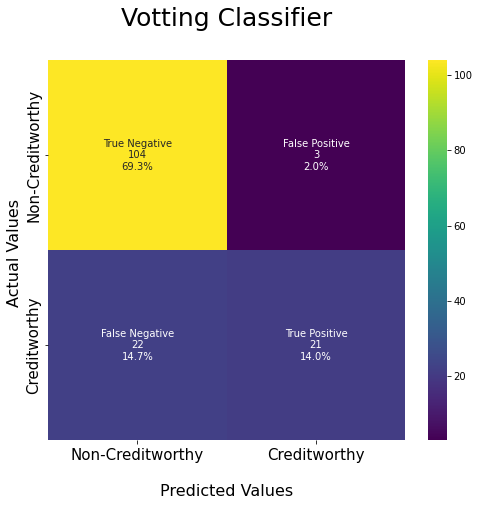

In [119]:
plot_metric(vc_matrix,'Votting Classifier','viridis')

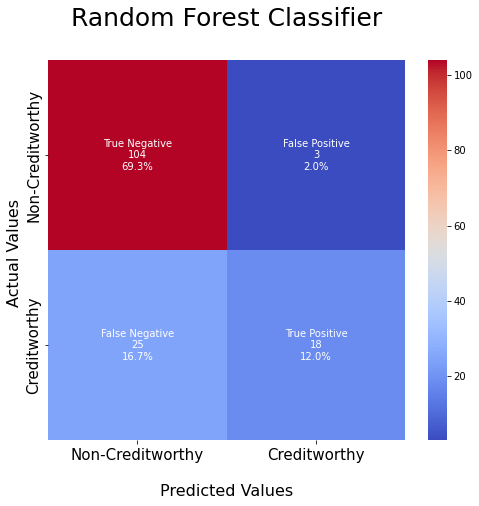

In [120]:
plot_metric(rf_matrix,'Random Forest Classifier','coolwarm')

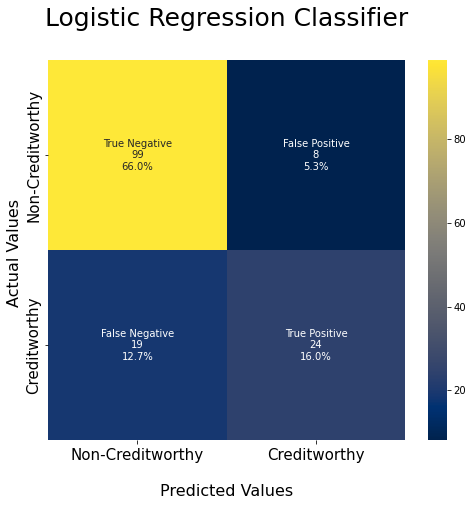

In [121]:
plot_metric(lr_matrix,'Logistic Regression Classifier','cividis')

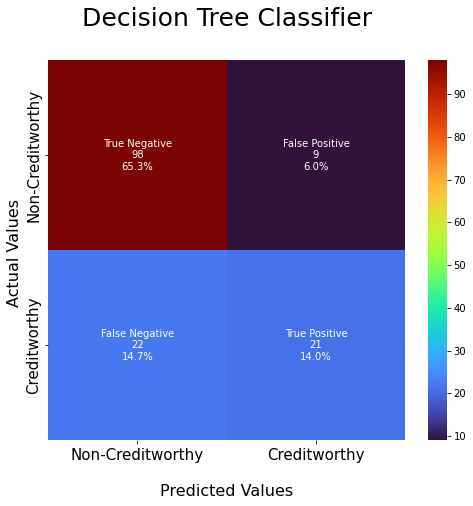

In [122]:
plot_metric(dc_matrix,'Decision Tree Classifier','turbo')

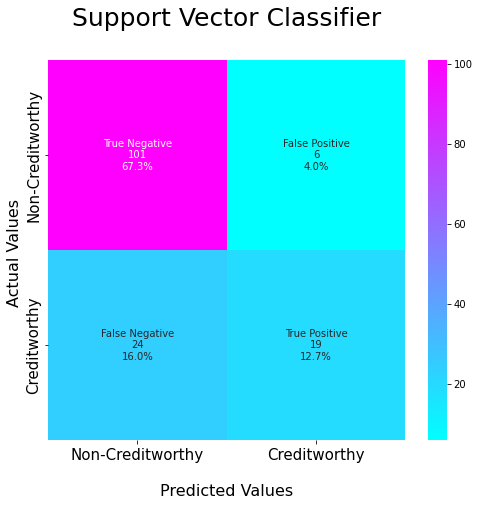

In [123]:
plot_metric(svc_matrix,'Support Vector Classifier','cool')

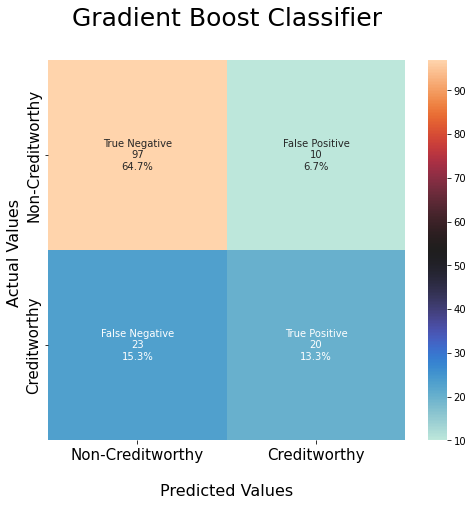

In [124]:
plot_metric(gb_matrix,'Gradient Boost Classifier','icefire')

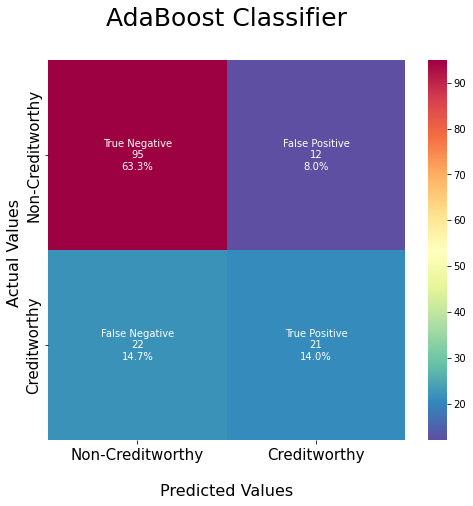

In [125]:
plot_metric(ab_matrix,'AdaBoost Classifier','Spectral_r')

### ROC Curve

In [126]:
# predict probabilities
pred_prob_dct = tree.predict_proba(X_test)
pred_prob_lgr = lgr.predict_proba(X_test)
pred_prob_svc = Svc_model.predict_proba(X_test)
pred_prob_rfc = rfc.predict_proba(X_test)
pred_prob_gb = gbc.predict_proba(X_test)
pred_prob_adb = adb_clf.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_dct[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_lgr[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_svc[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_rfc[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_gb[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_adb[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

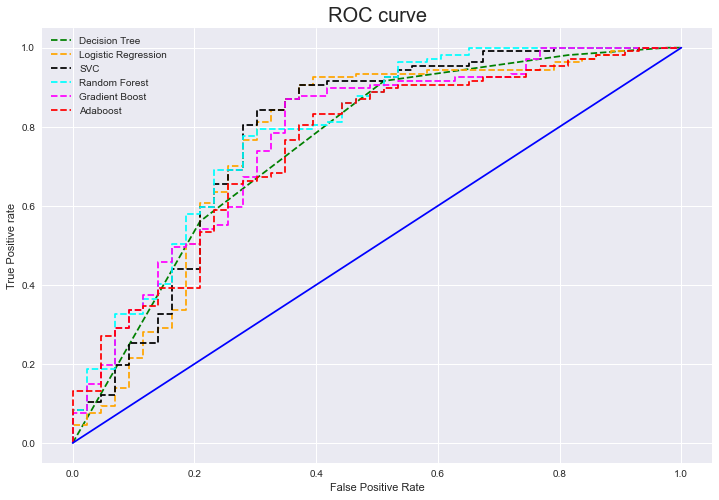

In [127]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(12, 8))
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='SVC')
plt.plot(fpr4, tpr4, linestyle='--',color='cyan', label='Random Forest')
plt.plot(fpr5, tpr5, linestyle='--',color='magenta', label='Gradient Boost')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='Adaboost')
plt.plot(p_fpr, p_tpr, color='blue')




# title
plt.title('ROC curve',fontdict={'fontsize':20})
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# The best model

Considering the F1 scores and the confudion matrix of the different models, the votting Classifier emerges as the best performing model followed by the Random Forest  model, however, since management is concerned about feature importance, the Random Forest classifier is chosen because it provides information on feature importance.

## 7.Feature-Importance

In [128]:
rfc.feature_importances_

array([0.15012395, 0.18864555, 0.04313515, 0.07084903, 0.09922339,
       0.02221168, 0.19251214, 0.01159312, 0.10770636, 0.01756786,
       0.03195744, 0.01638111, 0.01030541, 0.02500245, 0.01278535])

In [129]:
Feature_importance=pd.DataFrame({'Features':X_train.columns,'Importance':rfc.feature_importances_})

In [130]:
Feature_importance = Feature_importance.sort_values(by = 'Importance',ascending = False)

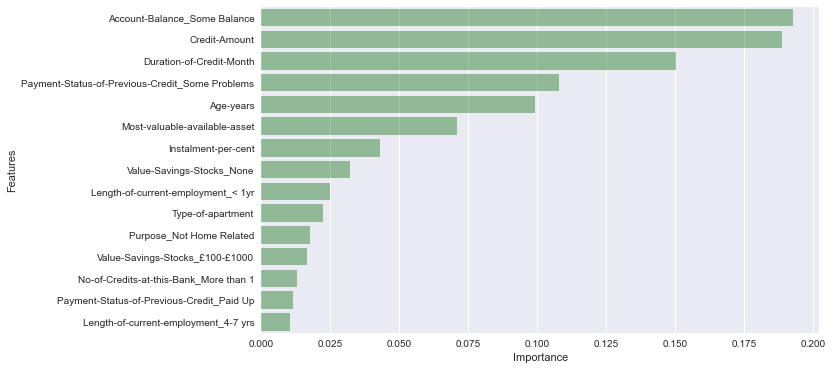

In [131]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Features',data = Feature_importance, color = 'g',alpha = 0.4)
plt.show()

From the plot above, the first six importance featyres include:

1. Account Balance
2. Credit Amount
3. Duration of Credit Amount
4. Payment Status of Previous credit
5. Age
6. Most Valuable available asset.
    

# 6.Implementing-the-best-Best-model-with-test-data

### Preprocessing the test data

In [132]:
test_data = pd.read_excel('customers-to-score.xlsx')

In [133]:
test_data.head(3)

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9,No Problems (in this bank),Home Related,2799,None,< 1yr,2,None,2,1,36,Other Banks/Depts,1,More than 1,1,2,1,1
1,No Account,12,No Problems (in this bank),Home Related,2122,None,< 1yr,3,None,2,1,39,Other Banks/Depts,1,More than 1,1,2,1,2
2,No Account,24,Paid Up,Home Related,3758,£100-£1000,< 1yr,1,None,4,4,23,Other Banks/Depts,1,1,1,1,1,1


In [134]:
for col in test_data.columns:
    print(col)

Account-Balance
Duration-of-Credit-Month
Payment-Status-of-Previous-Credit
Purpose
Credit-Amount
Value-Savings-Stocks
Length-of-current-employment
Instalment-per-cent
Guarantors
Duration-in-Current-address
Most-valuable-available-asset
Age-years
Concurrent-Credits
Type-of-apartment
No-of-Credits-at-this-Bank
Occupation
No-of-dependents
Telephone
Foreign-Worker


In [135]:
test_data.isnull().sum()

Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Duration-in-Current-address          0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

### Dropping the columns that were dropped in the training data set

In [136]:
test_data['Purpose'].replace({'Used car':'Not Home Related',
                          'New car':'Not Home Related',
                          'Other':'Not Home Related'},inplace=True)

In [137]:
test_data.drop(['Occupation',
            'Duration-in-Current-address',
            'Concurrent-Credits',
            'Telephone',
            'Guarantors',
            'Foreign-Worker',
            'No-of-dependents'],
           axis = 1,inplace = True)

In [138]:
for col in test_data.columns:
    print(col)

Account-Balance
Duration-of-Credit-Month
Payment-Status-of-Previous-Credit
Purpose
Credit-Amount
Value-Savings-Stocks
Length-of-current-employment
Instalment-per-cent
Most-valuable-available-asset
Age-years
Type-of-apartment
No-of-Credits-at-this-Bank


In [139]:
test_data = pd.get_dummies(test_data,columns =['Account-Balance',
                                       'Payment-Status-of-Previous-Credit',
                                          'Purpose',
                                       'Value-Savings-Stocks',
                                       'Length-of-current-employment',
                                          'No-of-Credits-at-this-Bank'],
                       drop_first = True) 

In [140]:
for col in test_data.columns:
    print(col)

Duration-of-Credit-Month
Credit-Amount
Instalment-per-cent
Most-valuable-available-asset
Age-years
Type-of-apartment
Account-Balance_Some Balance
Payment-Status-of-Previous-Credit_Paid Up
Payment-Status-of-Previous-Credit_Some Problems
Purpose_Not Home Related
Value-Savings-Stocks_None
Value-Savings-Stocks_£100-£1000
Length-of-current-employment_4-7 yrs
Length-of-current-employment_< 1yr
No-of-Credits-at-this-Bank_More than 1


In [141]:
assert (X_train.columns == test_data.columns).all()

In [142]:
test_pred = rfc.predict(test_data)

In [143]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [144]:
test_data['Prediction'] = test_pred

In [145]:
test_data['Prediction'].replace({1:'Creditworthy',0:'Non-Creditworthy'},inplace =True)

In [146]:
test_data['Prediction'].head(20)

0         Creditworthy
1         Creditworthy
2         Creditworthy
3         Creditworthy
4         Creditworthy
5         Creditworthy
6         Creditworthy
7         Creditworthy
8     Non-Creditworthy
9         Creditworthy
10        Creditworthy
11        Creditworthy
12        Creditworthy
13        Creditworthy
14        Creditworthy
15        Creditworthy
16        Creditworthy
17        Creditworthy
18        Creditworthy
19        Creditworthy
Name: Prediction, dtype: object

In [147]:
test_data['Prediction'].value_counts()

Creditworthy        438
Non-Creditworthy     62
Name: Prediction, dtype: int64

# 8.Summary

In summary, to get the best classification model, Exploratory Data Analysis and Feature Engineering were carried out to help select input features for building models.

Input Variables with less variations and input variables with over 30% missing values were dropped whilst variables with less than 30% missing values were handled appropriately.

The original train dataset was split into train and test for building and validating models respectively.

After comparing the different classification models using F1score, and confusion matrix, the Votting Classifier model and the Random Forest model emerged as the top performing models.

But the Random Forest model was chosen over the Votting Classifier because of it's ability to return feature importance which was key to the management team as compared the Votting classifier model.

The Random Forest model was used to predict apllicants who were credit worthy and those that are not and it found that 438 and 

62 were credit worthy and non-cerdit worthy repectively. 


# Thank You

In [148]:
ls


 Volume in drive C is OS
 Volume Serial Number is A277-A192

 Directory of C:\Users\Owner\Desktop\Loan prediction Project

07/07/2022  04:59 AM    <DIR>          .
07/07/2022  04:28 AM    <DIR>          ..
07/04/2022  03:37 AM    <DIR>          .ipynb_checkpoints
07/04/2022  03:43 AM            38,910 credit-data-training.xlsx
06/27/2022  04:45 PM            48,498 customers-to-score.xlsx
06/27/2022  04:45 PM        21,041,885 Loan data.csv
06/27/2022  04:45 PM             1,984 Loan Elegibility test_data.csv
07/07/2022  04:59 AM           942,196 Loan Elegibilty Prediction Project.ipynb
06/27/2022  04:45 PM           162,830 Loan Prediction-Solution.ipynb
06/27/2022  04:45 PM            81,787 Loan Project.ipynb
07/06/2022  04:26 AM            22,235 loan_train.csv
06/27/2022  04:45 PM        21,041,664 Loans data.csv
06/27/2022  04:45 PM        21,031,892 LoansTrainingSetV2.csv
06/27/2022  04:45 PM             1,113 Predicted_Output.csv
07/07/2022  04:57 AM           257,610 ROC.png
